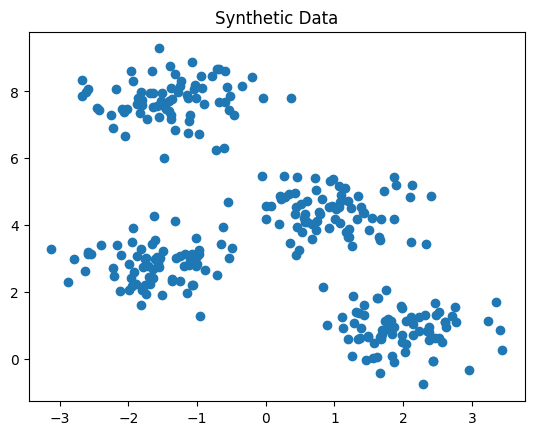

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

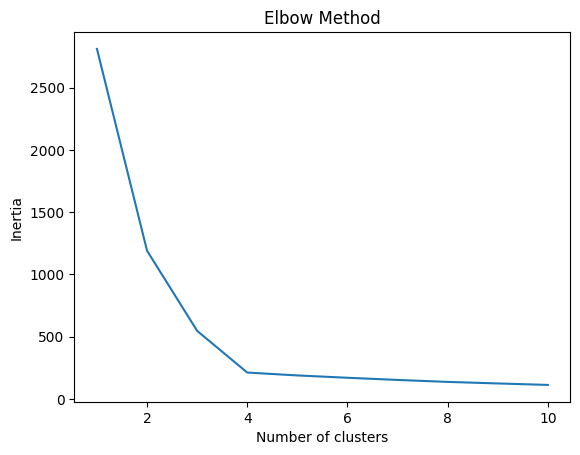

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6819938690643478


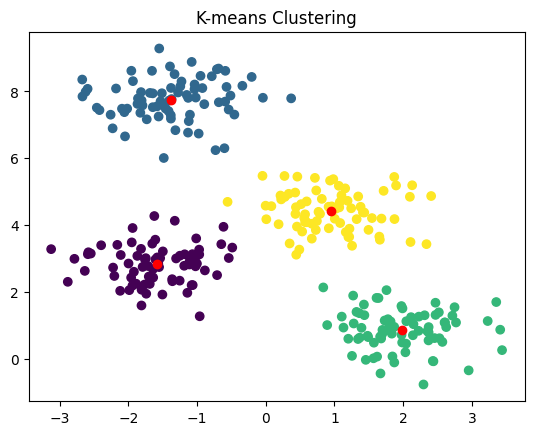

In [1]:
# Importing required libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the synthetic data
plt.scatter(X[:, 0], X[:, 1])
plt.title('Synthetic Data')
plt.show()

# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Applying K-means with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()


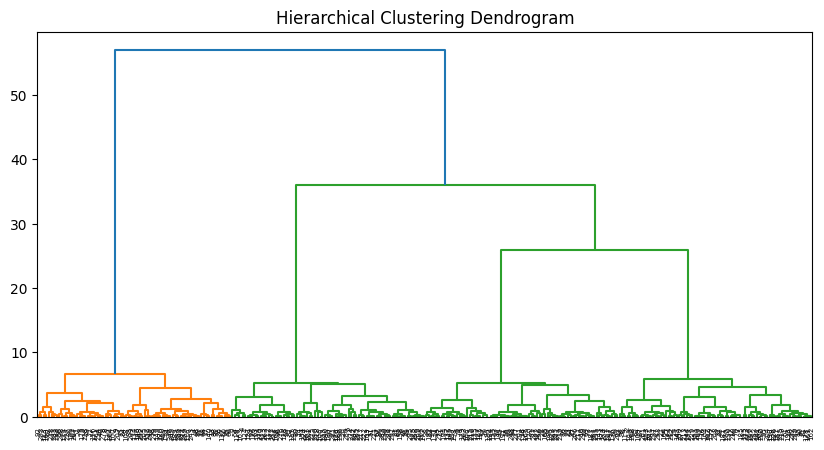

In [2]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


Affinity Propagation Silhouette Score: 0.3321815434758543


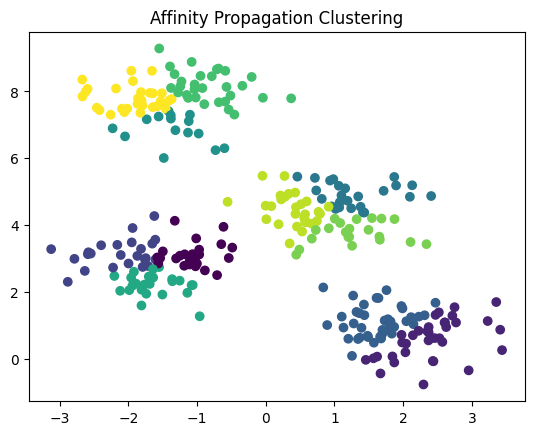

In [3]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X)

# Silhouette Score
af_sil_score = silhouette_score(X, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()


DBSCAN Silhouette Score: 0.6303800996842714


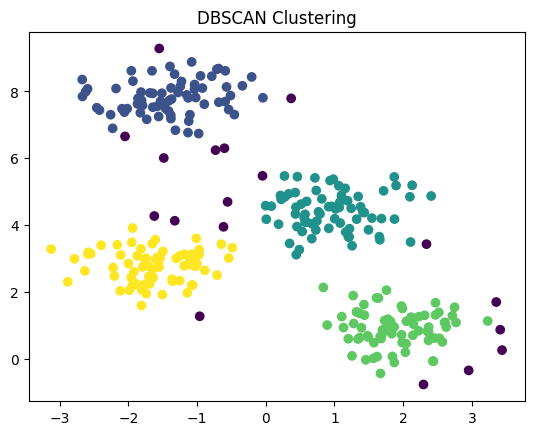

In [4]:
# Importing required library
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()
